<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Trade_Surveillance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Generate random stock symbols
stocks = ['AAPL', 'GOOGL', 'AMZN', 'TSLA', 'MSFT']

# Simulate data for trades
np.random.seed(42)
num_trades = 1000  # Simulate 1000 trades
trade_data = {
    'TradeID': np.arange(1, num_trades+1),
    'StockSymbol': np.random.choice(stocks, num_trades),
    'TraderID': np.random.randint(1000, 1100, num_trades),
    'Price': np.round(np.random.uniform(100, 1500, num_trades), 2),
    'Volume': np.random.randint(1, 1000, num_trades),
    'Timestamp': [datetime.now() - timedelta(minutes=random.randint(0, 10000)) for _ in range(num_trades)]
}

# Create a DataFrame
df_trades = pd.DataFrame(trade_data)


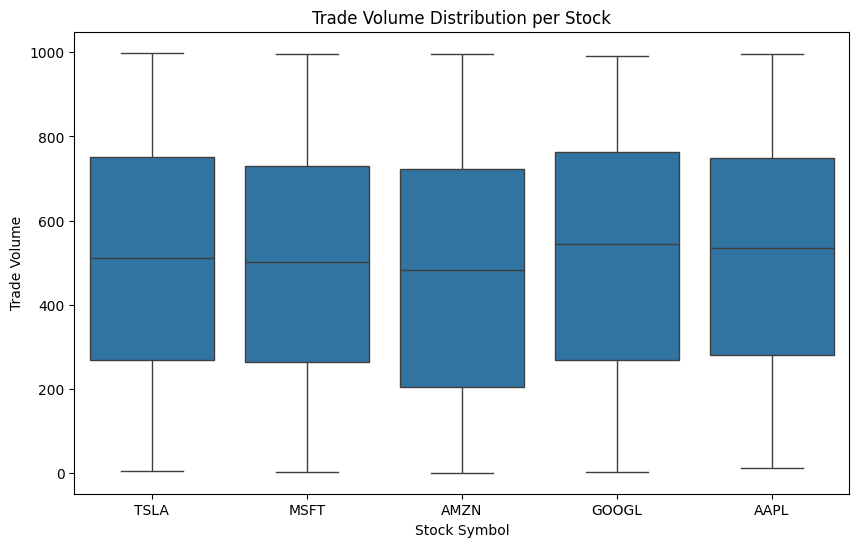

In [6]:
# Plot volume distribution by StockSymbol
plt.figure(figsize=(10, 6))
sns.boxplot(x='StockSymbol', y='Volume', data=df_trades)
plt.title('Trade Volume Distribution per Stock')
plt.xlabel('Stock Symbol')
plt.ylabel('Trade Volume')
plt.show()


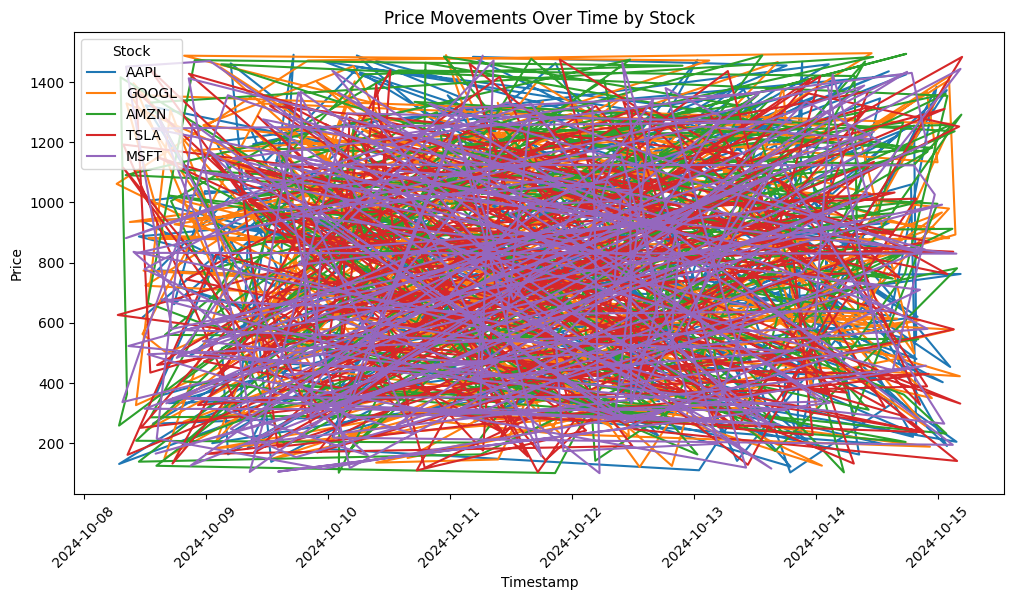

In [7]:
# Plot price movements over time for each stock
plt.figure(figsize=(12, 6))
for stock in stocks:
    stock_data = df_trades[df_trades['StockSymbol'] == stock]
    plt.plot(stock_data['Timestamp'], stock_data['Price'], label=stock)

plt.title('Price Movements Over Time by Stock')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend(title='Stock')
plt.xticks(rotation=45)
plt.show()


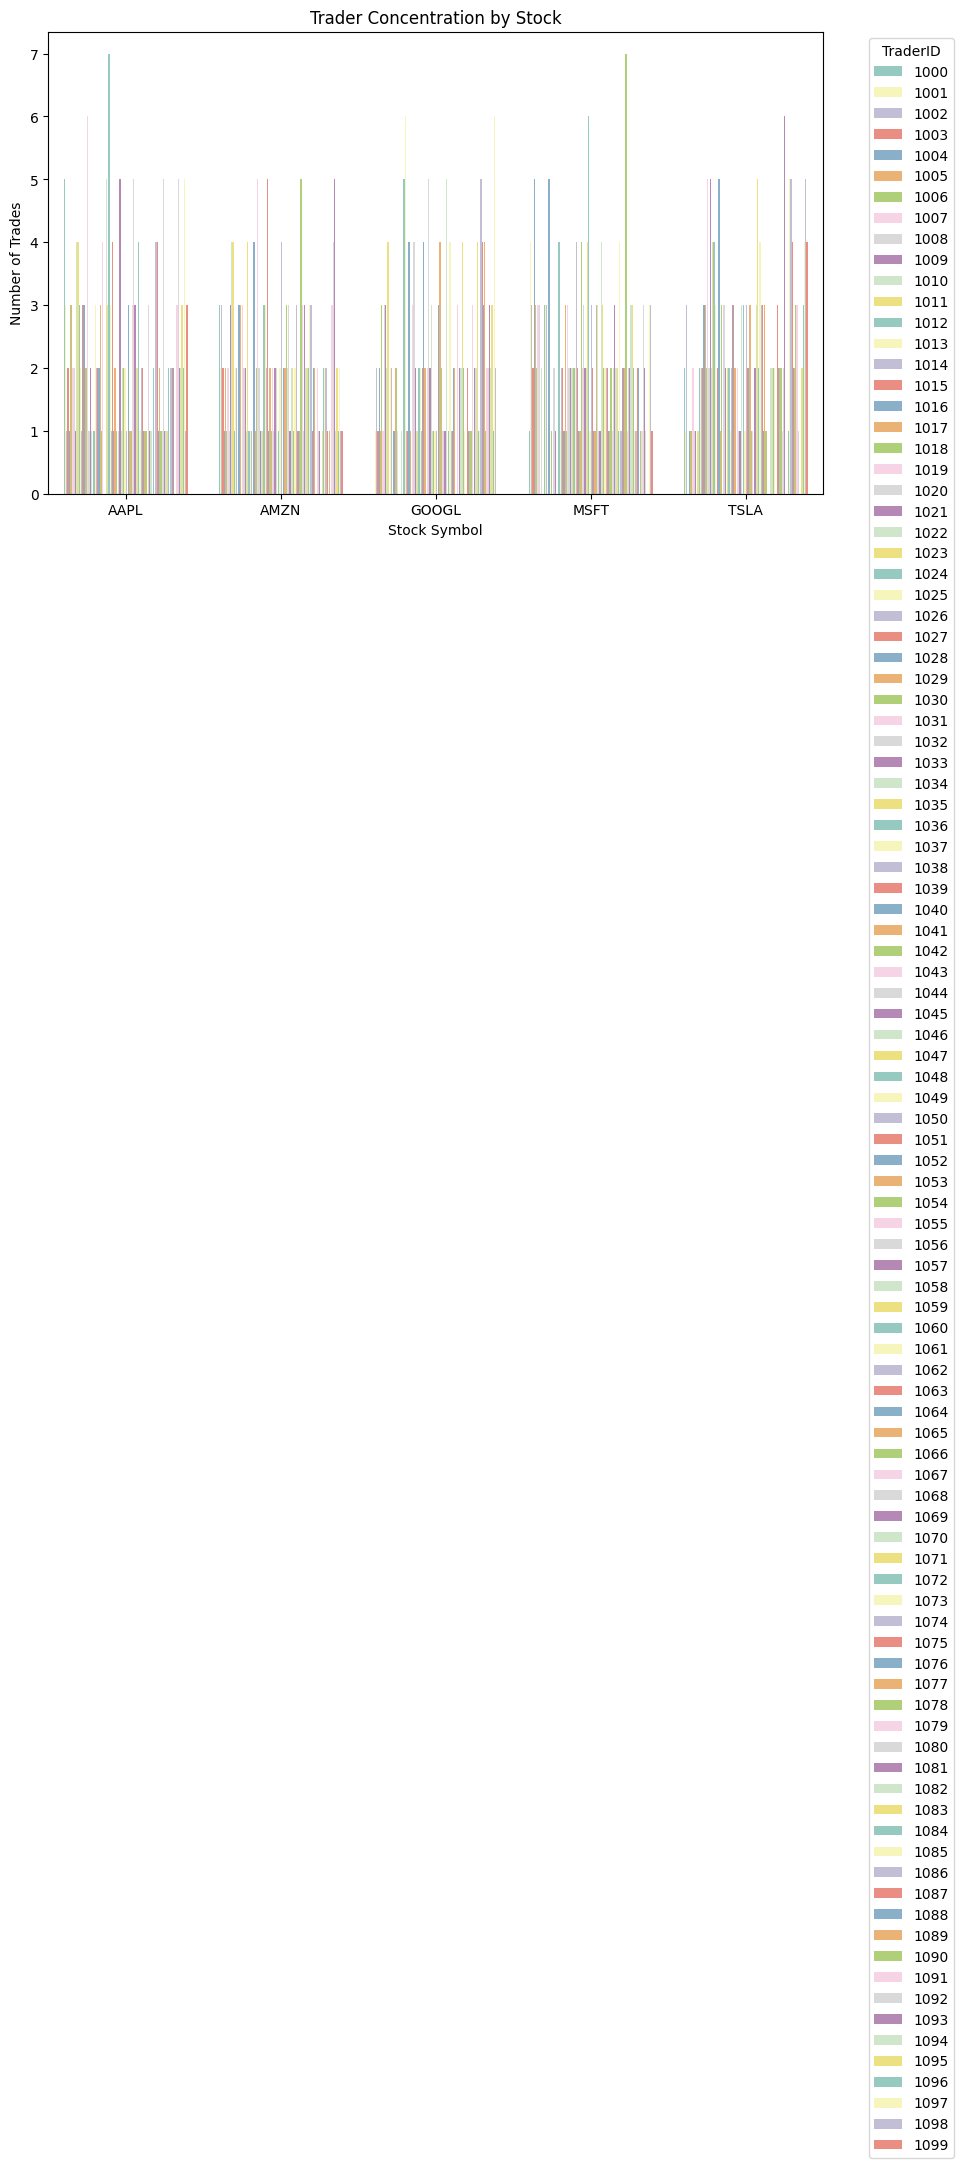

In [8]:
# Calculate trader concentration
trader_concentration = df_trades.groupby(['StockSymbol', 'TraderID'])['TradeID'].count().reset_index()
trader_concentration.columns = ['StockSymbol', 'TraderID', 'TradeCount']

# Visualize trader concentration
plt.figure(figsize=(10, 6))
sns.barplot(x='StockSymbol', y='TradeCount', hue='TraderID', data=trader_concentration, palette='Set3')
plt.title('Trader Concentration by Stock')
plt.xlabel('Stock Symbol')
plt.ylabel('Number of Trades')
plt.legend(title='TraderID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


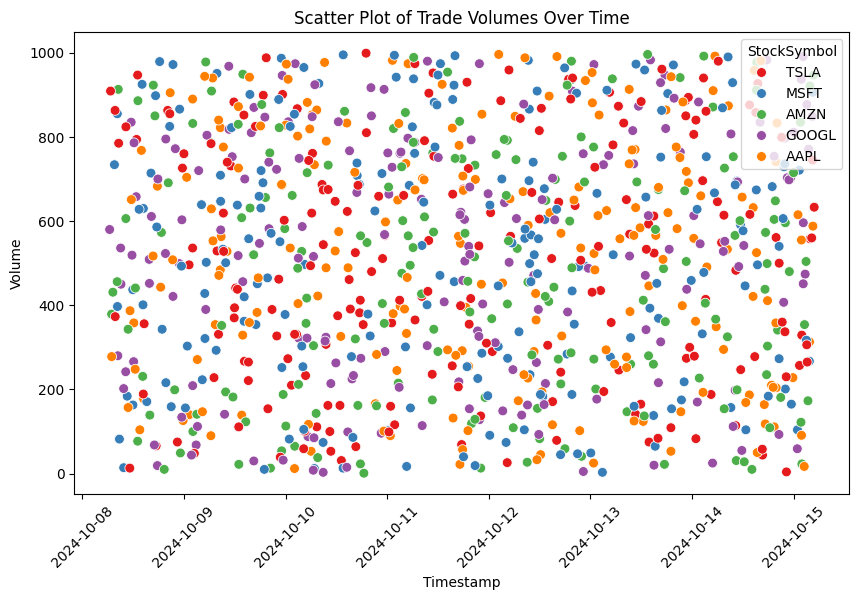

In [9]:
# Scatter plot for volume outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='Volume', hue='StockSymbol', data=df_trades, palette='Set1', s=50)
plt.title('Scatter Plot of Trade Volumes Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()
